### Read in and plot SIA and SIMASS seasonal cycle for selected fast members between 2023 equivalent year and first ice-free day, averaged over the 9 quick transition members
#### Written by A. Jahn, CU Boulder, June/July 2024, updated Oct 2024 for revisions
## Creates Figure 3 in Heuze and Jahn, 2024, Nature Communications

In [1]:
import numpy as np
import xarray as xr
import glob 
import datetime
import matplotlib.pyplot as plt


In [2]:
#Convert daily data array with one time dimension in datetime64 to array of year and julien day of the year in two columns
def to_year_dayofyear(ds):
    year = ds.time.dt.year
    dayofyear = ds.time.dt.dayofyear
    
    # assign new coords
    ds = ds.assign_coords(year=("time", year.data), dayofyear=("time",dayofyear.data))

    # reshape the array to (..., "daofyear", "year")
    return ds.set_index(time=("year", "dayofyear")).unstack("time")  

In [3]:
data_path = '/glade/work/ajahn/CMIP6_daily_sic_data/'

In [4]:
#MPI-ESM1-2-LR
# r43i1p1f1 is fast, 6yr, 2026 to 2032

hist_MPI= xr.open_dataset(data_path+'/SIE_SIA_daily_CMIP6_Hist/SIA_SIE_hist_MPI-ESM1-2-LR_r43i1p1f1.nc')#fast

file_MPI  = xr.open_dataset(data_path+'ssp_SIA_SIE_data/SIA_SIE_ssp245_MPI-ESM1-2-LR_r43i1p1f1.nc')#fast


#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_MPI = xr.cftime_range(start='2015-01-01', periods=len(file_MPI['time']), 
                           freq='D', calendar='standard'
                           )     
file_MPI['time'] = dates_MPI

file_MPI=file_MPI.convert_calendar('noleap',align_on='date') #remove leap days 


dates2_MPI = xr.cftime_range(start='1850-01-01', periods=len(hist_MPI['time']), 
                           freq='D', calendar='standard'

                        )  
hist_MPI['time'] = dates2_MPI

hist_MPI=hist_MPI.convert_calendar('noleap',align_on='date') #remove leap days 

#Change format of time in ssp so can plot hist and ssp together
file_MPI["time"] = file_MPI["time"].astype("datetime64[ns]")

hist_MPI["time"] = hist_MPI["time"].astype("datetime64[ns]")

#Combine the two datasets
SIA_MPI=xr.concat((hist_MPI['Arctic_SIA']/1e12,file_MPI['Arctic_SIA']/1e12),dim='time')





In [5]:
#MPI-ESM1-2-LR
#r38i1p1f1 is fast, 6yr, 2038 to 2044

hist_MPI2= xr.open_dataset(data_path+'/SIE_SIA_daily_CMIP6_Hist/SIA_SIE_hist_MPI-ESM1-2-LR_r38i1p1f1.nc')#fast


file_MPI2  = xr.open_dataset(data_path+'ssp_SIA_SIE_data/SIA_SIE_ssp370_MPI-ESM1-2-LR_r38i1p1f1.nc')#fast

#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_MPI2 = xr.cftime_range(start='2015-01-01', periods=len(file_MPI2['time']), 
                           freq='D', calendar='standard'
                           )     

file_MPI2['time'] = dates_MPI2

file_MPI2=file_MPI2.convert_calendar('noleap',align_on='date') #remove leap days 


dates2_MPI2 = xr.cftime_range(start='1850-01-01', periods=len(hist_MPI2['time']), 
                           freq='D', calendar='standard'

                        )  
hist_MPI2['time'] = dates2_MPI2

hist_MPI2=hist_MPI2.convert_calendar('noleap',align_on='date') #remove leap days 

#Change format of time in ssp so can plot hist and ssp together
file_MPI2["time"] = file_MPI2["time"].astype("datetime64[ns]")

hist_MPI2["time"] = hist_MPI2["time"].astype("datetime64[ns]")

#Combine the two datasets
SIA_MPI2=xr.concat((hist_MPI2['Arctic_SIA']/1e12,file_MPI2['Arctic_SIA']/1e12),dim='time')




In [6]:
#CanESM5	r8i1p1f1 goes ice-free in 4yr, 2028 to 2032 ssp126
hist_Can= xr.open_dataset(data_path+'/SIE_SIA_daily_CMIP6_Hist/SIA_SIE_hist_CanESM5_r8i1p1f1.nc')#fast

file_Can = xr.open_dataset(data_path+'ssp_SIA_SIE_data/SIA_SIE_ssp126_CanESM5_r8i1p1f1.nc')#fast

#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_Can = xr.cftime_range(start='2015-01-01', periods=len(file_Can['time']), 
                           freq='D', calendar='noleap'
                           )     
file_Can['time'] = dates_Can

#Change format of time in ssp so can plot hist and ssp together
file_Can["time"] = file_Can["time"].astype("datetime64[ns]")

hist_Can["time"] = hist_Can["time"].astype("datetime64[ns]")

#Combine the two datasets
SIA_Can=xr.concat((hist_Can['Arctic_SIA'],file_Can['Arctic_SIA']/1e12),dim='time')



In [7]:
#CanESM5	r9i1p1f1 goes ice-free in 6yr, 2031 to 2037 ssp126
hist_Can_r9= xr.open_dataset(data_path+'/SIE_SIA_daily_CMIP6_Hist/SIA_SIE_hist_CanESM5_r9i1p1f1.nc')#fast

file_Can_r9 = xr.open_dataset(data_path+'ssp_SIA_SIE_data/SIA_SIE_ssp126_CanESM5_r9i1p1f1.nc')#fast

#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_Can_r9 = xr.cftime_range(start='2015-01-01', periods=len(file_Can['time']), 
                           freq='D', calendar='noleap'
                           )     
file_Can_r9['time'] = dates_Can_r9

#Change format of time in ssp so can plot hist and ssp together
file_Can_r9["time"] = file_Can_r9["time"].astype("datetime64[ns]")

hist_Can_r9["time"] = hist_Can_r9["time"].astype("datetime64[ns]")

#Combine the two datasets
SIA_Can_r9=xr.concat((hist_Can_r9['Arctic_SIA'],file_Can_r9['Arctic_SIA']/1e12),dim='time')



In [8]:
#ACCESS-CM2	r6i1p1f1, at 2023 in 2022, ice-free in	2028, in 6yr, under	ssp370
hist_ACCESS_r6= xr.open_dataset(data_path+'/SIE_SIA_daily_CMIP6_Hist/SIA_SIE_hist_ACCESS-CM2_r6i1p1f1.nc')#Fast

file_ACCESS_r6 = xr.open_dataset(data_path+'ssp_SIA_SIE_data/SIA_SIE_ssp370_ACCESS-CM2_r6i1p1f1.nc')#fast


#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_ACCESS_r6 = xr.cftime_range(start='2015-01-01', periods=len(file_ACCESS_r6['time']), 
                           freq='D', calendar='standard'
                           )     
file_ACCESS_r6['time'] = dates_ACCESS_r6

#Change format of time in ssp so can plot hist and ssp together
file_ACCESS_r6["time"] = file_ACCESS_r6["time"].astype("datetime64[ns]")

SIA_ACCESS_r6=xr.concat((hist_ACCESS_r6['Arctic_SIA']/1e12,file_ACCESS_r6['Arctic_SIA']/1e12),dim='time')

SIA_ACCESS_r6=SIA_ACCESS_r6.convert_calendar('noleap',align_on='date') #remove leap days from obs data 

In [9]:
#ACCESS-CM2	r7i1p1f1, ssp126, only need SSP for this one, as 2023 value is in 2017 and ice-free in 2021
hist_ACCESS= xr.open_dataset(data_path+'/SIE_SIA_daily_CMIP6_Hist/SIA_SIE_hist_ACCESS-CM2_r7i1p1f1.nc')#Fast

file_ACCESS = xr.open_dataset(data_path+'ssp_SIA_SIE_data/SIA_SIE_ssp126_ACCESS-CM2_r7i1p1f1.nc')#fast


#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_ACCESS = xr.cftime_range(start='2015-01-01', periods=len(file_ACCESS['time']), 
                           freq='D', calendar='standard'
                           )     
file_ACCESS['time'] = dates_ACCESS

#Change format of time in ssp so can plot hist and ssp together
file_ACCESS["time"] = file_ACCESS["time"].astype("datetime64[ns]")

SIA_ACCESS=xr.concat((hist_ACCESS['Arctic_SIA']/1e12,file_ACCESS['Arctic_SIA']/1e12),dim='time')

SIA_ACCESS=SIA_ACCESS.convert_calendar('noleap',align_on='date') #remove leap days from obs data 


In [10]:
#EC-earth r8i1p1f1, fast ice free from 2025 to 2030
file_EC_r8 = xr.open_dataset(data_path+'ssp_SIA_SIE_data/SIA_SIE_ssp126_EC-Earth3_r8i1p1f1.nc')#fast

#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_EC_r8 = xr.cftime_range(start='2015-01-01', periods=len(file_EC_r8['time']), 
                           freq='D', calendar='standard'
                           )     
file_EC_r8['time'] = dates_EC_r8
#Change format of time in ssp so can plot hist and ssp together
file_EC_r8["time"] = file_EC_r8["time"].astype("datetime64[ns]")
file_EC_r8=file_EC_r8.convert_calendar('noleap',align_on='date') #remove leap days from obs data 


SIA_EC_r8=file_EC_r8['Arctic_SIA']/1e12


In [11]:
#EC-earth, r12i1p1f1 fast ice free from 2026 to 2031
file_EC_r12 = xr.open_dataset(data_path+'ssp_SIA_SIE_data/SIA_SIE_ssp245_EC-Earth3_r12i1p1f1.nc')#fast
hist_EC_r12= xr.open_dataset(data_path+'/SIE_SIA_daily_CMIP6_Hist/SIA_SIE_hist_EC-Earth3_r12i1p1f1.nc')


#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_EC_r12 = xr.cftime_range(start='2015-01-01', periods=len(file_EC_r12['time']), 
                           freq='D', calendar='standard'
                           )     
file_EC_r12['time'] = dates_EC_r12
#Change format of time in ssp so can plot hist and ssp together
file_EC_r12["time"] = file_EC_r12["time"].astype("datetime64[ns]")
file_EC_r12=file_EC_r12.convert_calendar('noleap',align_on='date') #remove leap days from obs data 
hist_EC_r12=hist_EC_r12.convert_calendar('noleap',align_on='date') #remove leap days from obs data 


#Combine the two datasets
SIA_EC_r12=xr.concat((hist_EC_r12['Arctic_SIA'],file_EC_r12['Arctic_SIA']/1e12),dim='time')


In [12]:
#EC-earth r4i1p1f1, fast ice free from 2038 to 2041
file_EC = xr.open_dataset(data_path+'ssp_SIA_SIE_data/SIA_SIE_ssp126_EC-Earth3_r4i1p1f1.nc')#fast

#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_EC = xr.cftime_range(start='2015-01-01', periods=len(file_EC['time']), 
                           freq='D', calendar='noleap'
                           )     
file_EC['time'] = dates_EC
#Change format of time in ssp so can plot hist and ssp together
file_EC["time"] = file_EC["time"].astype("datetime64[ns]")
file_EC=file_EC.convert_calendar('noleap',align_on='date') #remove leap days from obs data 

SIA_EC=file_EC['Arctic_SIA']/1e12


<Figure size 4800x3600 with 0 Axes>

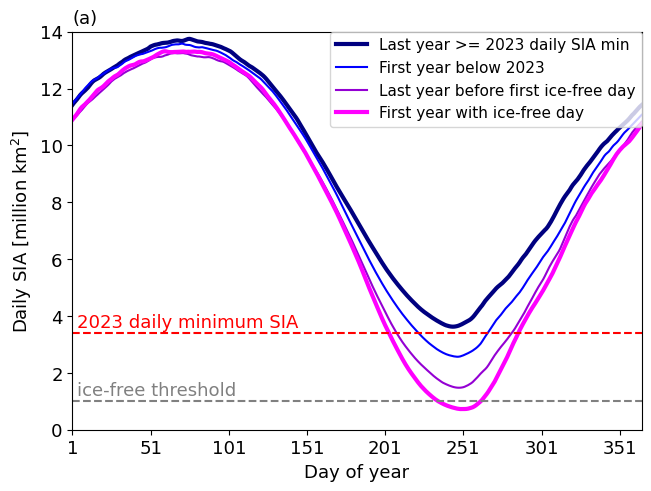

In [13]:
#Make average over all 9 members, averaging the years that do overlap
plt.figure(figsize=(8, 6), dpi=600)

plt.figure(constrained_layout=True)

days_of_year=np.arange(1,366)

last_2023_SIA=(SIA_MPI.sel(time="2026"),SIA_MPI2.sel(time="2038"),SIA_ACCESS.sel(time="2017"),SIA_ACCESS_r6.sel(time="2022"),SIA_EC.sel(time="2038"),SIA_EC_r8.sel(time="2025"), SIA_EC_r12.sel(time="2026"),SIA_Can.sel(time="2028"),SIA_Can_r9.sel(time="2031"))#'Last year >= 2023 daily SIA min'
last_2023_sia_avg=np.mean(np.array(last_2023_SIA),axis=0)
plt.plot(days_of_year,last_2023_sia_avg,color = 'navy',linewidth=3,label='Last year >= 2023 daily SIA min')

Year1_SIA=(SIA_MPI.sel(time="2027"),SIA_MPI2.sel(time="2039"),SIA_ACCESS.sel(time="2018"),SIA_ACCESS_r6.sel(time="2023"),SIA_EC.sel(time="2039"),SIA_EC_r8.sel(time="2026"), SIA_EC_r12.sel(time="2027"),SIA_Can.sel(time="2029"),SIA_Can_r9.sel(time="2032"))#First year below 2023 SIA
Year1_sia_avg=np.mean(np.array(Year1_SIA),axis=0)
plt.plot(days_of_year,Year1_sia_avg,color = 'blue',label='First year below 2023')

Last_before_free_SIA=(SIA_MPI.sel(time="2031"),SIA_MPI2.sel(time="2043"),SIA_ACCESS.sel(time="2020"),SIA_ACCESS_r6.sel(time="2027"),SIA_EC.sel(time="2040"),SIA_EC_r8.sel(time="2029"), SIA_EC_r12.sel(time="2030"),SIA_Can.sel(time="2031"),SIA_Can_r9.sel(time="2036"))#First ice-free year(Ice_free_sia_avg)
Last_before_free_sia_avg=np.mean(np.array(Last_before_free_SIA),axis=0)
plt.plot(days_of_year,Last_before_free_sia_avg,color = 'darkviolet',label='Last year before first ice-free day')

Ice_free_SIA=(SIA_MPI.sel(time="2032"),SIA_MPI2.sel(time="2044"),SIA_ACCESS.sel(time="2021"),SIA_ACCESS_r6.sel(time="2028"),SIA_EC.sel(time="2041"),SIA_EC_r8.sel(time="2030"), SIA_EC_r12.sel(time="2031"),SIA_Can.sel(time="2032"),SIA_Can_r9.sel(time="2037"))#First ice-free year(Ice_free_sia_avg)
Ice_free_sia_avg=np.mean(np.array(Ice_free_SIA),axis=0)
plt.plot(days_of_year,Ice_free_sia_avg,color = 'fuchsia',linewidth=3,label='First year with ice-free day')

plt.legend(loc='upper right', borderaxespad=0.,fontsize="11",)
plt.axhline(y = 1, color = 'grey', linestyle = '--')#,label='1 million km2') 
plt.axhline(y = 3.39, color = 'red', linestyle = '--')#,label='2023 daily min SIA')  
plt.text(4, 1.2, 'ice-free threshold', fontsize=13, color='grey')
plt.text(4, 3.6, '2023 daily minimum SIA', fontsize=13, color='red')
plt.axis([1, 365, 0, 14])
plt.xticks(np.arange(1,365,50),fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Day of year",fontsize=13)
plt.ylabel("Daily SIA [million km$^2$]",fontsize=13)
plt.title('(a)',loc='left',fontsize=13)
plt.savefig('SIA_average_seasonal_2023_to_ice_free.pdf')


## Now make the average plot for SIMASS, monthly as not all models had daily data

In [14]:
#MPI-ESM1-2-LR
# r43i1p1f1 takes 6yr to ice-free day, 2026 to 2032

file_MPI  = xr.open_dataset(data_path+'simass/SIMASS_N30_MPI-ESM1-2-LR_ssp245_r43i1p1f1.nc')#fast

#Make ssp time dimension so xarray can use it 
dates_MPI = xr.cftime_range(start='2015-01-01', periods=len(file_MPI['time']), 
                           freq='ME', calendar='standard'
                           )     
file_MPI['time'] = dates_MPI

#Change format of time 
file_MPI["time"] = file_MPI["time"].astype("datetime64[ns]")

SIM_MPI=file_MPI['simass']

In [15]:
#MPI-ESM1-2-LR
#r38i1p1f1 takes 6yr to ice-free day, 2038 to 2044

file_MPI2  = xr.open_dataset(data_path+'simass/SIMASS_N30_MPI-ESM1-2-LR_ssp370_r38i1p1f1.nc')#fast

dates_MPI2 = xr.cftime_range(start='2015-01-01', periods=len(file_MPI2['time']), 
                           freq='ME', calendar='standard'
                           )     

file_MPI2['time'] = dates_MPI2

#Change format of time 
file_MPI2["time"] = file_MPI2["time"].astype("datetime64[ns]")

SIM_MPI2=file_MPI2['simass']

In [16]:
#CanESM5	
# r8i1p1f1 goes ice-free in 4yr, 2028 to 2032 ssp126

file_Can = xr.open_dataset(data_path+'simass/SIMASS_N30_CanESM5_ssp126_r8i1p1f1.nc')#fast

dates_Can = xr.cftime_range(start='2015-01-01', periods=len(file_Can['time']), 
                           freq='ME', calendar='noleap'
                           )     
file_Can['time'] = dates_Can

#Combine the two datasets
SIM_Can=file_Can['simass']

In [17]:
#CanESM5	
# r9i1p1f1 goes ice-free in 6yr, 2031 to 2037 ssp126

file_Can_r9 = xr.open_dataset(data_path+'simass/SIMASS_N30_CanESM5_ssp126_r9i1p1f1.nc')#fast

dates_Can_r9 = xr.cftime_range(start='2015-01-01', periods=len(file_Can['time']), 
                           freq='ME', calendar='noleap'
                           )     
file_Can_r9['time'] = dates_Can_r9

SIM_Can_r9=file_Can_r9['simass']

In [18]:
#ACCESS-CM2	r6i1p1f1, 
# at 2023 in 2022, ice-free in	2028, in 6yr, under	ssp370

file_ACCESS_r6 = xr.open_dataset(data_path+'simass/SIMASS_N30_ACCESS-CM2_ssp370_r6i1p1f1.nc')#fast


dates_ACCESS_r6 = xr.cftime_range(start='2015-01-01', periods=len(file_ACCESS_r6['time']), 
                           freq='ME', calendar='standard'
                           )     
file_ACCESS_r6['time'] = dates_ACCESS_r6

#Change format of time 
file_ACCESS_r6["time"] = file_ACCESS_r6["time"].astype("datetime64[ns]")

SIM_ACCESS_r6=file_ACCESS_r6['simass']

In [19]:
#ACCESS-CM2	r7i1p1f1, ssp126, 
# only need SSP for this one, as 2023 value is in 2017 and ice-free in 2021

file_ACCESS = xr.open_dataset(data_path+'simass/SIMASS_N30_ACCESS-CM2_ssp126_r7i1p1f1.nc')#fast


#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_ACCESS = xr.cftime_range(start='2015-01-01', periods=len(file_ACCESS['time']), 
                           freq='ME', calendar='standard'
                           )     
file_ACCESS['time'] = dates_ACCESS

file_ACCESS["time"] = file_ACCESS["time"].astype("datetime64[ns]")

SIM_ACCESS=file_ACCESS['simass']

In [20]:
#EC-earth r8i1p1f1, 
# Goes ice free from 2025 to 2030
file_EC_r8 = xr.open_dataset(data_path+'simass/SIMASS_N30_EC-Earth3_ssp126_r8i1p1f1.nc')#fast

#Make ssp time dimension so xarray can use it and then remove leap day, if needed
dates_EC_r8 = xr.cftime_range(start='2015-01-01', periods=len(file_EC_r8['time']), 
                           freq='ME', calendar='standard'
                           )     
file_EC_r8['time'] = dates_EC_r8
#Change format of time 
file_EC_r8["time"] = file_EC_r8["time"].astype("datetime64[ns]")

SIM_EC_r8=file_EC_r8['simass']


In [21]:
#EC-earth, r12i1p1f1 
# goes ice free from 2026 to 2031
file_EC_r12 = xr.open_dataset(data_path+'simass/SIMASS_N30_EC-Earth3_ssp245_r12i1p1f1.nc')#fast


#Make ssp time dimension so xarray can use it 
dates_EC_r12 = xr.cftime_range(start='2015-01-01', periods=len(file_EC_r12['time']), 
                           freq='ME', calendar='standard'
                           )     
file_EC_r12['time'] = dates_EC_r12

file_EC_r12["time"] = file_EC_r12["time"].astype("datetime64[ns]")

SIM_EC_r12=file_EC_r12['simass']


In [22]:
#EC-earth r4i1p1f1, 
# goes ice free from 2038 to 2041
file_EC = xr.open_dataset(data_path+'simass/SIMASS_N30_EC-Earth3_ssp126_r4i1p1f1.nc')#fast

#Make ssp time dimension so xarray can use it 
dates_EC = xr.cftime_range(start='2015-01-01', periods=len(file_EC['time']), 
                           freq='ME', calendar='noleap'
                           )     
file_EC['time'] = dates_EC

file_EC["time"] = file_EC["time"].astype("datetime64[ns]")

SIM_EC=file_EC['simass']

<Figure size 5280x3600 with 0 Axes>

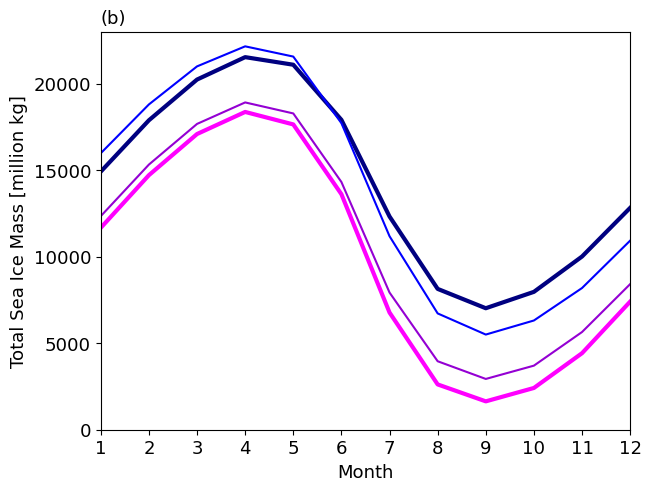

In [59]:
#Make average over all 9 members, averaging the years that do overlap
months_of_year=np.arange(1,13)
plt.figure(figsize=(8.8, 6), dpi=600)
plt.figure(constrained_layout=True)

last_2023_SIM=(SIM_MPI.sel(time="2026"),SIM_MPI2.sel(time="2038"),SIM_ACCESS.sel(time="2017"),SIM_ACCESS_r6.sel(time="2022"),SIM_EC.sel(time="2038"),SIM_EC_r8.sel(time="2025"), SIM_EC_r12.sel(time="2026"),SIM_Can.sel(time="2028"),SIM_Can_r9.sel(time="2031"))#'Last year >= 2023 daily SIM min'
last_2023_SIM_avg=np.mean(np.array(last_2023_SIM),axis=0)/1e12
plt.plot(months_of_year,last_2023_SIM_avg,color = 'navy',linewidth=3,label='Last year >= 2023 daily SIM min')

#plt.plot(daily_SIM.sel(time="2023"),color = 'black', label='CDR SIM',linewidth=1)

Year1_SIM=(SIM_MPI.sel(time="2027"),SIM_MPI2.sel(time="2039"),SIM_ACCESS.sel(time="2018"),SIM_ACCESS_r6.sel(time="2023"),SIM_EC.sel(time="2039"),SIM_EC_r8.sel(time="2026"), SIM_EC_r12.sel(time="2027"),SIM_Can.sel(time="2029"),SIM_Can_r9.sel(time="2032"))#First year below 2023 SIM
Year1_SIM_avg=np.mean(np.array(Year1_SIM),axis=0)/1e12
plt.plot(months_of_year,Year1_SIM_avg,color = 'blue',label='First year below 2023')

Last_before_free_SIM=(SIM_MPI.sel(time="2031"),SIM_MPI2.sel(time="2043"),SIM_ACCESS.sel(time="2020"),SIM_ACCESS_r6.sel(time="2027"),SIM_EC.sel(time="2040"),SIM_EC_r8.sel(time="2029"), SIM_EC_r12.sel(time="2030"),SIM_Can.sel(time="2031"),SIM_Can_r9.sel(time="2036"))#First ice-free year(Ice_free_SIM_avg)
Last_before_free_SIM_avg=np.mean(np.array(Last_before_free_SIM),axis=0)/1e12
plt.plot(months_of_year,Last_before_free_SIM_avg,color = 'darkviolet',label='Last year before first ice-free day')


Ice_free_SIM=(SIM_MPI.sel(time="2032"),SIM_MPI2.sel(time="2044"),SIM_ACCESS.sel(time="2021"),SIM_ACCESS_r6.sel(time="2028"),SIM_EC.sel(time="2041"),SIM_EC_r8.sel(time="2030"), SIM_EC_r12.sel(time="2031"),SIM_Can.sel(time="2032"),SIM_Can_r9.sel(time="2037"))#First ice-free year(Ice_free_SIM_avg)
Ice_free_SIM_avg=np.mean(np.array(Ice_free_SIM),axis=0)/1e12
plt.plot(months_of_year,Ice_free_SIM_avg,color = 'fuchsia',linewidth=3,label='First year with ice-free day')

#plt.legend()
plt.axis([1, 12, 0, 23000]);
plt.xticks(np.arange(1,13,1));
plt.xlabel("Month",fontsize=13);
plt.ylabel("Total Sea Ice Mass [million kg]",fontsize=13);
plt.yticks(fontsize=13);
plt.xticks(fontsize=13);
plt.title('(b)',loc='left',fontsize=13)
plt.savefig('SIMASS_average_seasonal_2023_to_ice_free_no_legend.pdf')



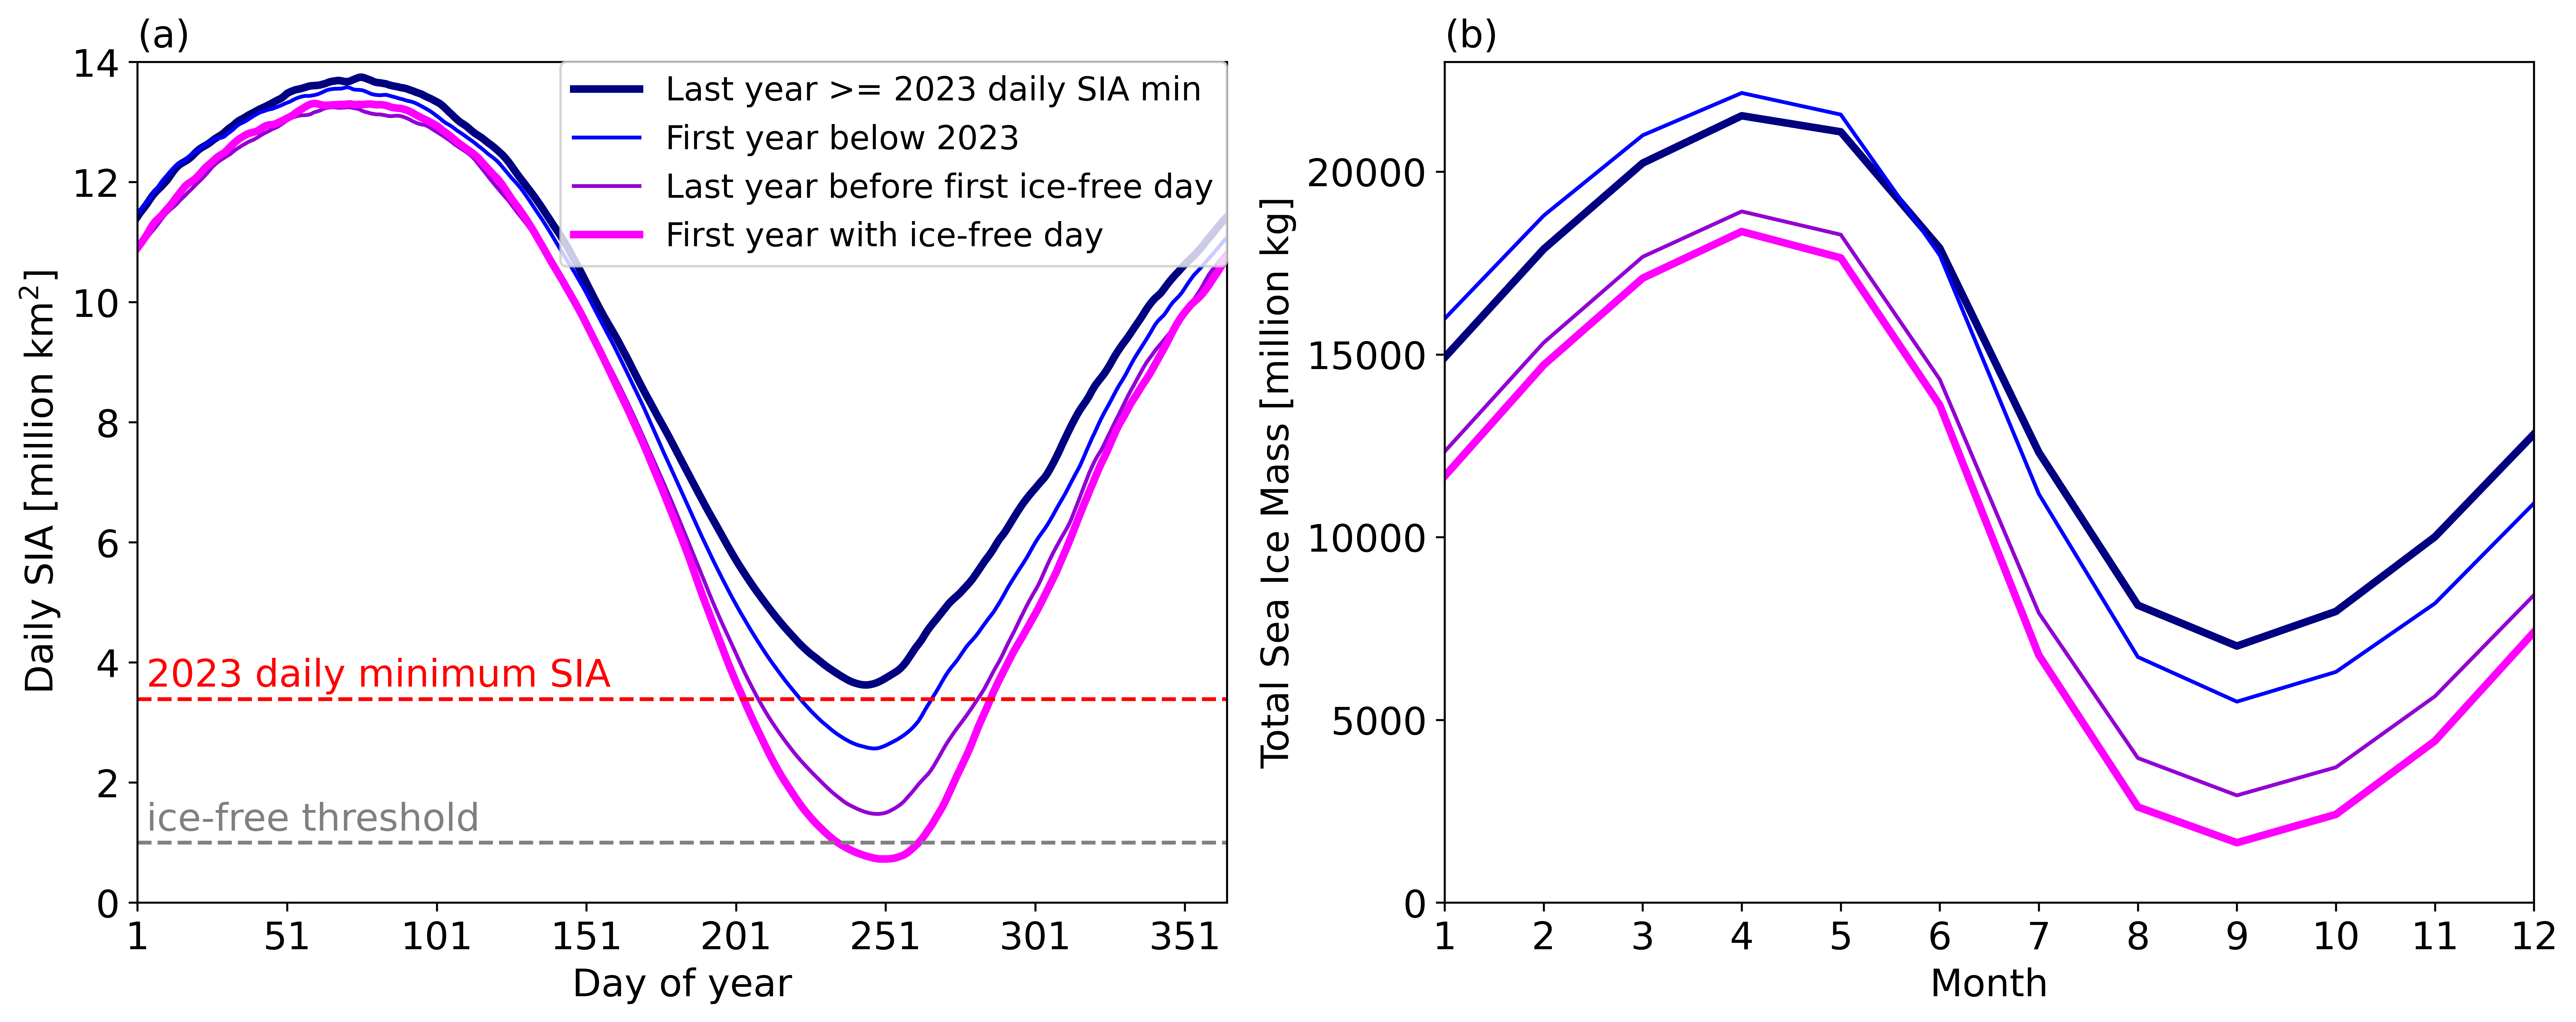

In [60]:
# Joint figure, for final submission (Fig 3 in Paper)

f = plt.figure(figsize=(17,6),dpi=600)
f.tight_layout()
ax = f.add_subplot(121)
#create subplots

ax.plot(days_of_year,last_2023_sia_avg,color = 'navy',linewidth=3,label='Last year >= 2023 daily SIA min')
ax.plot(days_of_year,Year1_sia_avg,color = 'blue',label='First year below 2023')
ax.plot(days_of_year,Last_before_free_sia_avg,color = 'darkviolet',label='Last year before first ice-free day')
ax.plot(days_of_year,Ice_free_sia_avg,color = 'fuchsia',linewidth=3,label='First year with ice-free day')
ax.legend(loc='upper right', borderaxespad=0.,fontsize="13",)
ax.axhline(y = 1, color = 'grey', linestyle = '--')#,label='1 million km2') 
ax.axhline(y = 3.39, color = 'red', linestyle = '--')#,label='2023 daily min SIA')  
ax.text(4, 1.2, 'ice-free threshold', fontsize=15, color='grey')
ax.text(4, 3.6, '2023 daily minimum SIA', fontsize=15, color='red')
ax.axis([1, 365, 0, 14])
plt.xticks(np.arange(1,365,50),fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Day of year",fontsize=15)
plt.ylabel("Daily SIA [million km$^2$]",fontsize=15)
plt.title('(a)',loc='left',fontsize=15)

ax2 = f.add_subplot(122)

ax2.plot(months_of_year,last_2023_SIM_avg,color = 'navy',linewidth=3,label='Last year >= 2023 daily SIM min')
ax2.plot(months_of_year,Year1_SIM_avg,color = 'blue',label='First year below 2023')
ax2.plot(months_of_year,Last_before_free_SIM_avg,color = 'darkviolet',label='Last year before first ice-free day')
ax2.plot(months_of_year,Ice_free_SIM_avg,color = 'fuchsia',linewidth=3,label='First year with ice-free day')
ax2.axis([1, 12, 0, 23000]);
plt.xticks(np.arange(1,13,1));
plt.xlabel("Month",fontsize=15);
plt.ylabel("Total Sea Ice Mass [million kg]",fontsize=15);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);
plt.title('(b)',loc='left',fontsize=15)
plt.savefig('SIA_SIMASS_average_seasonal_2023_to_ice_free.pdf')
